In [9]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [10]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [11]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [13]:
train_scaled, val_scaled, train_target, val_target =\
train_test_split(train_scaled, train_target, test_size=0.2)

In [15]:
train_scaled.shape

(38400, 28, 28, 1)

In [16]:
model = keras.Sequential()

In [17]:
model.add(
    keras.layers.Conv2D(
        32, 
        kernel_size=3, 
        activation='relu', 
        padding='same', 
        input_shape=(28, 28, 1) #사진의 크기
    )
)

C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(
    keras.layers.MaxPooling2D(2) #2*2의 압축, 우리 데이터를 1/2로
)

In [19]:
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size=3,
        activation='relu',
        padding='same'
    )
)

In [20]:
model.add(keras.layers.MaxPooling2D(2))

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,636 (1.28 MB)

 Trainable params: 335,636 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 최적의 모델을 찾으면 멈추고 저장

cp_cb = keras.callbacks.ModelCheckpoint(
    'best-cnn-model.keras',
    save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4381 - loss: 1.4580 - val_accuracy: 0.7619 - val_loss: 0.5920
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7478 - loss: 0.6049 - val_accuracy: 0.8110 - val_loss: 0.4894
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8005 - loss: 0.5059 - val_accuracy: 0.8459 - val_loss: 0.3966
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8345 - loss: 0.4367 - val_accuracy: 0.8693 - val_loss: 0.3553
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8681 - loss: 0.3756 - val_accuracy: 0.8925 - val_loss: 0.3089
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8849 - loss: 0.3373 - val_accuracy: 0.8995 - val_loss: 0.2907
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8973 - loss: 0.3071 - val_accuracy: 0.9061 - val_loss: 0.2852
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9031 - lo

In [32]:
import matplotlib.pyplot as plt

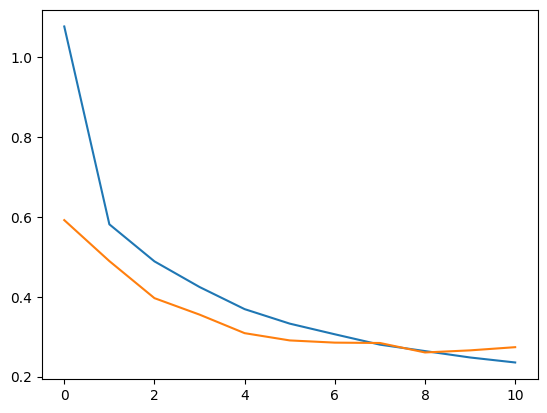

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [43]:
model.evaluate(val_scaled, val_target)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9128 - loss: 0.2607


[0.26055189967155457, 0.9132291674613953]

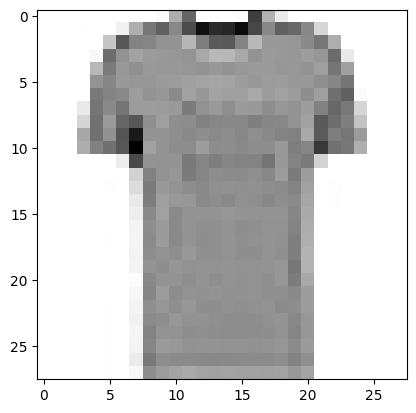

In [36]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [38]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.41, 0.  , 0.02, 0.23, 0.01, 0.  , 0.32, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.  , 0.85]],
      dtype=float32)

In [40]:
test_scaled = test_input.reshape(-1, 28, 28, 1) /255.0

In [41]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9018 - loss: 0.2894


[0.28443557024002075, 0.9031000137329102]

In [42]:
test_input.shape

(10000, 28, 28)